In [1]:
import pandas as pd
from ultralytics import YOLO
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


Prueba con datos de test YOLOV8

In [13]:
# Configuración
modelo_path = "C:\\Users\\dalil\\Desktop\\Tesis_2025\\TFG---Clasificacion-de-trajes\\YOLOV8\\runs\\classify\\train\\weights\\best.pt"
csv_path = "dataset_labels.csv"
output_csv = "C:\\Users\\dalil\\Desktop\\Tesis_2025\\TFG---Clasificacion-de-trajes\\pruebas\\predicciones\\predicciones_septimo_modelo.csv" 

# Cargar el modelo YOLO
model = YOLO(modelo_path)

# Cargar dataset CSV
df = pd.read_csv(csv_path, header=None, names=["link_imagen", "categoria", "split"])

# Filtrar solo las imágenes de prueba
df_test = df[df["split"] == "val"]

# Realizar predicciones
predicciones = []
for img_path in df_test["link_imagen"]:
    if not os.path.exists(img_path):
        print(f"Archivo no encontrado: {img_path}")
    else:
        resultados = model(img_path)  # Inferencia con YOLO
        prediccion = resultados[0].names[int(resultados[0].probs.top1)]  # Obtener la clase más probable
        predicciones.append(prediccion)

# Agregar la columna de predicción al DataFrame
df_test["prediccion"] = predicciones

# Guardar nuevo CSV con predicciones
df_test.to_csv(output_csv, index=False)

print(f"Predicciones guardadas en {output_csv}")




image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\val\fantasia\IMG0575_FAN_FE.png: 256x256 fantasia 1.00, inspiracion 0.00, popular 0.00, tradicional 0.00, 50.1ms
Speed: 4.3ms preprocess, 50.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\val\fantasia\IMG0577_FAN_FE.png: 256x256 fantasia 0.99, inspiracion 0.01, tradicional 0.00, popular 0.00, 47.4ms
Speed: 2.5ms preprocess, 47.4ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\val\fantasia\IMG0585_FAN_FE.png: 256x256 popular 1.00, fantasia 0.00, inspiracion 0.00, tradicional 0.00, 43.6ms
Speed: 3.0ms preprocess, 43.6ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\val\fantasia\IMG0594_FAN_FE.png: 256x256 f

C:\Users\dalil\AppData\Local\Temp\ipykernel_21332\1126723878.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["prediccion"] = predicciones


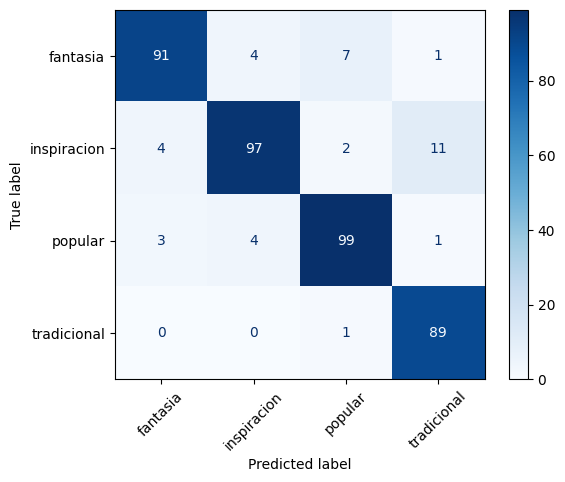

              precision    recall  f1-score     support
fantasia       0.928571  0.883495  0.905473  103.000000
inspiracion    0.923810  0.850877  0.885845  114.000000
popular        0.908257  0.925234  0.916667  107.000000
tradicional    0.872549  0.988889  0.927083   90.000000
accuracy       0.908213  0.908213  0.908213    0.908213
macro avg      0.908297  0.912124  0.908767  414.000000
weighted avg   0.909831  0.908213  0.907659  414.000000


In [14]:

# Cargar el CSV con las predicciones
ruta_csv = output_csv
df = pd.read_csv(ruta_csv)

# Extraer etiquetas reales y predichas
y_true = df["categoria"].tolist()   # Etiquetas reales
y_pred = df["prediccion"].tolist()  # Etiquetas predichas

# Obtener las clases únicas (en caso de que haya errores en el CSV, eliminamos duplicados)
clases = sorted(set(y_true + y_pred))

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=clases)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

# Generar reporte de métricas
reporte = classification_report(y_true, y_pred, labels=clases, output_dict=True)

# Convertir a DataFrame para visualizar mejor
df_reporte = pd.DataFrame(reporte).transpose()

# Mostrar métricas por categoría
print(df_reporte)

# Opcional: Guardar en un archivo CSV
df_reporte.to_csv("reporte_metricas.csv", index=True)

